<a href="https://colab.research.google.com/github/Juikson/master/blob/main/WS_DL_CNN_Classification_Q1_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WS DL CNN Classification

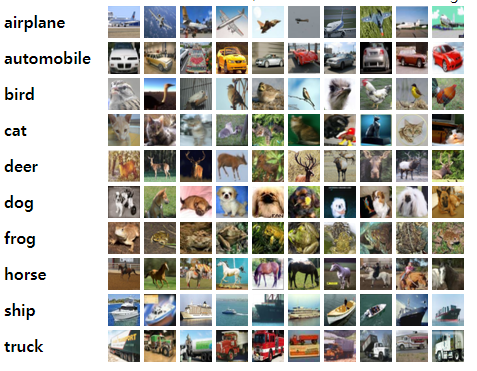

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings(action='ignore')

### 파일 다운로드

- keras의 datasets 에서 cifar10 데이터를 다운로드 하세요.

In [ ]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

170498071/170498071 [==============================] - 15s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

### 데이터 확인 및 전처리

- 학습 데이터 9개를 시각화 해보세요.

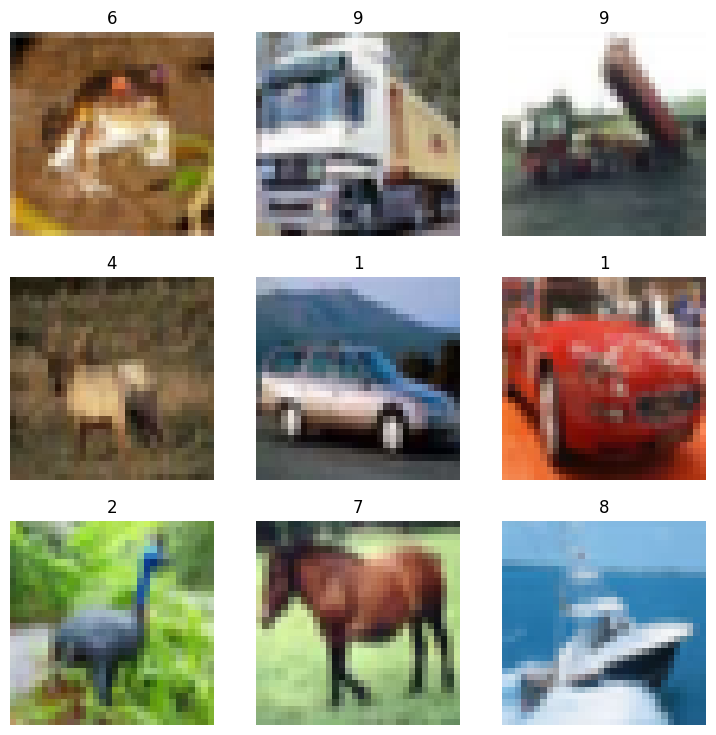

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
for i in range(9):
    plt.subplot(3, 3, 1 + i)
    plt.imshow(train_images[i])
    plt.title(train_labels[i][0])
    plt.axis('off')
plt.show()

- train_images와 test_images를 255로 나누어 정규화 하세요.

In [ ]:
train_images_scaled = train_images/255
test_images_scaled = test_images/255

- train_labels와 test_labels를 to_categorical 함수를 통해서 One-Hot 변환하세요.

In [ ]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_images.shape

(50000, 32, 32, 3)

### 모델 구성 및 학습

- Sequential API를 이용하여 CNN 모델을 생성하세요.
    - 입력 shape = (32, 32, 3)
    - 합성곱 계층 = Conv2D 2개
    - 필터 개수 = 32개 (출력 Feature Map 수)
    - 필터 size = (3,3)
    - 활성화 함수 = relu
    - 패딩 = same
    - 풀링 계층 = 맥스풀링 1개
    - 풀링 size = (2,2) 입니다.
    - Dense에 입력으로 넣기 위한 Flatten 계층을 추가해주세요.
    - 은닉층 = 1개
    - 뉴런 수 = 128개
    - 출력 수 = 10개

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, 3, activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, 3, activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

- 모델을 컴파일 하세요
    - loss = categorical_crossentropy
    - optimizer = adam
    - metrics = accuracy

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

- 모델을 학습시키세요
    - epoch=100
    - batch_size=128
    - train = train_images, train_labels
    - validation_data = (test_images, test_labels)
    - validation_data로 test_images와 test_labels를 지정하세요.
- 학습 결과를 history 변수에 저장하세요.

In [ ]:
history = model.fit(train_images, train_labels, epochs=100, batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/100
391/391 [==============================] - 8s 9ms/step - loss: 0.6944 - accuracy: 0.3803 - val_loss: 0.2340 - val_accuracy: 0.4761
Epoch 2/100
391/391 [==============================] - 3s 8ms/step - loss: 0.2167 - accuracy: 0.5259 - val_loss: 0.2195 - val_accuracy: 0.5268
Epoch 3/100
391/391 [==============================] - 3s 7ms/step - loss: 0.1919 - accuracy: 0.5907 - val_loss: 0.2087 - val_accuracy: 0.5568
Epoch 4/100
391/391 [==============================] - 3s 7ms/step - loss: 0.1701 - accuracy: 0.6507 - val_loss: 0.2173 - val_accuracy: 0.5423
Epoch 5/100
391/391 [==============================] - 3s 7ms/step - loss: 0.1502 - accuracy: 0.6996 - val_loss: 0.2154 - val_accuracy: 0.5662
Epoch 6/100
391/391 [==============================] - 4s 11ms/step - loss: 0.1323 - accuracy: 0.7459 - val_loss: 0.2321 - val_accuracy: 0.5568
Epoch 7/100
391/391 [==============================] - 3s 7ms/step - loss: 0.1136 - accuracy: 0.7905 - val_loss: 0.2351 - val_accuracy: 0.567

- 학습 결과를 시각화 하세요.

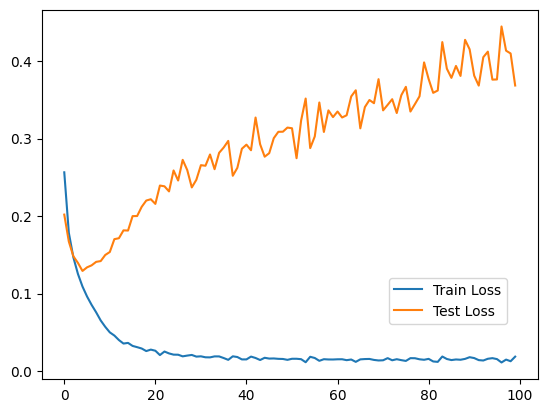

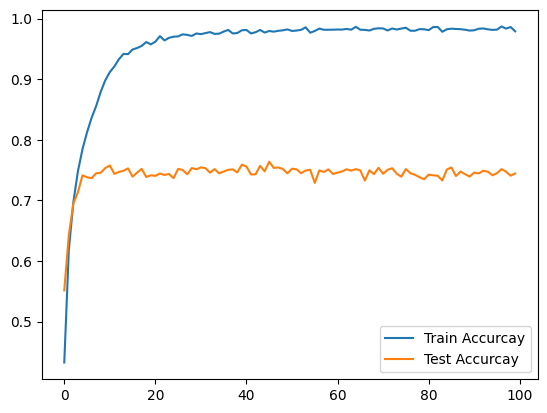

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend(loc=(0.7, 0.15))
plt.show()

plt.plot(history.history['accuracy'], label='Train Accurcay')
plt.plot(history.history['val_accuracy'], label='Test Accurcay')
plt.legend()
plt.show()

모델을 재정의하세요. (Summary를 참고하세요)
CNN 레이어에 드롭아웃을 적용하세요.
입력 shape = (32, 32, 3)
합성곱 1계층 = Conv2D 2개
필터 개수 = 32개 (출력 Feature Map 수)
필터 size = (3,3)
활성화 함수 = relu
풀링 계층 = 맥스풀링 1개
풀링 size = (2,2)
드롭아웃 = 0.2
합성곱 2계층 = Conv2D 2개
필터 개수 = 64개 (출력 Feature Map 수)
필터 size = (3,3)
활성화 함수 = relu
풀링 size = (2,2)
드롭아웃 = 0.2
합성곱 3계층 = Conv2D 2개
필터 개수 = 128개 (출력 Feature Map 수)
필터 size = (3,3)
활성화 함수 = relu
풀링 size = (2,2)
드롭아웃 = 0.2
패딩 = same (Conv2D만)
Dense에 입력으로 넣기 위한 Flatten 계층을 추가해주세요.
은닉층 = 1개
뉴런 수 = 128개
출력 수 = 10개

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model =

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

- 모델을 컴파일 하세요
    - loss = categorical_crossentropy
    - optimizer = adam
    - metrics = accuracy

- 모델을 학습시키세요
    - epoch=100
    - batch_size=128
    - train = train_images, train_labels
    - validation_data = (test_images, test_labels)
    - validation_data로 test_images와 test_labels를 지정하세요.
- 학습 결과를 history 변수에 저장하세요.

In [ ]:
history =

Epoch 1/100
391/391 [==============================] - 6s 12ms/step - loss: 1.5009 - accuracy: 0.4655 - val_loss: 1.2105 - val_accuracy: 0.5717
Epoch 2/100
391/391 [==============================] - 4s 11ms/step - loss: 1.0648 - accuracy: 0.6246 - val_loss: 1.0392 - val_accuracy: 0.6384
Epoch 3/100
391/391 [==============================] - 5s 14ms/step - loss: 0.8821 - accuracy: 0.6931 - val_loss: 0.9131 - val_accuracy: 0.6849
Epoch 4/100
391/391 [==============================] - 5s 12ms/step - loss: 0.7528 - accuracy: 0.7355 - val_loss: 0.8900 - val_accuracy: 0.6958
Epoch 5/100
391/391 [==============================] - 5s 12ms/step - loss: 0.6627 - accuracy: 0.7688 - val_loss: 0.8766 - val_accuracy: 0.7062
Epoch 6/100
391/391 [==============================] - 4s 11ms/step - loss: 0.5684 - accuracy: 0.8013 - val_loss: 0.8626 - val_accuracy: 0.7180
Epoch 7/100
391/391 [==============================] - 4s 11ms/step - loss: 0.4809 - accuracy: 0.8292 - val_loss: 0.8654 - val_accuracy:

- 학습 결과를 시각화 하세요.

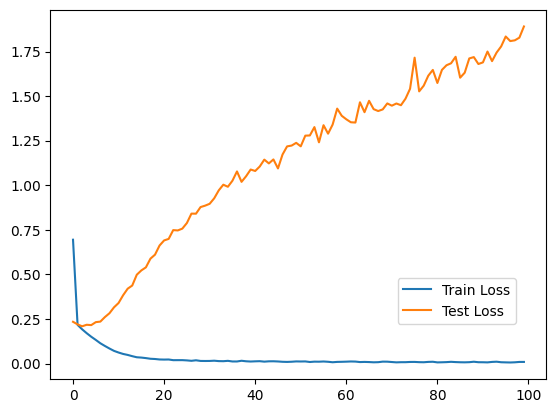

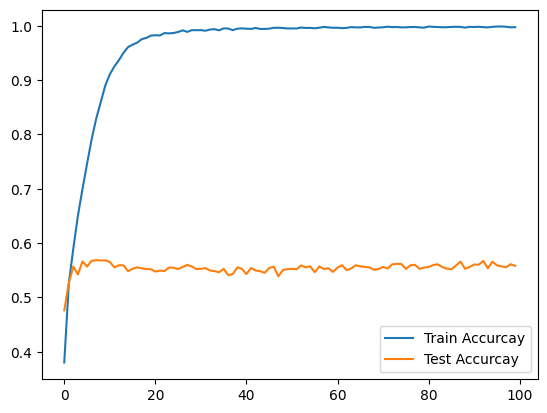

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend(loc=(0.7, 0.15))
plt.show()

plt.plot(history.history['accuracy'], label='Train Accurcay')
plt.plot(history.history['val_accuracy'], label='Test Accurcay')
plt.legend()
plt.show()

- 모델을 재정의하세요. (Summary를 참고하세요)
    - 입력 shape = (32, 32, 3)
    - 합성곱 1계층 = Conv2D 2개
    - 필터 개수 = 32개 (출력 Feature Map 수)
    - 필터 size = (3,3)
    - 활성화 함수 = relu
    - 풀링 계층 = 맥스풀링 1개
    - 풀링 size = (2,2)
    - 합성곱 2계층 = Conv2D 2개
    - 필터 개수 = 64개 (출력 Feature Map 수)
    - 필터 size = (3,3)
    - 활성화 함수 = relu
    - 풀링 size = (2,2)
    - 합성곱 3계층 = Conv2D 2개
    - 필터 개수 = 128개 (출력 Feature Map 수)
    - 필터 size = (3,3)
    - 활성화 함수 = relu
    - 풀링 size = (2,2)
    - 패딩 = same (Conv2D만)
    - Dense에 입력으로 넣기 위한 Flatten 계층을 추가해주세요.
    - 은닉층 = 1개
    - 뉴런 수 = 128개
    - 출력 수 = 10개

In [ ]:
model = Sequential()

model.add(Conv2D(32, 3, activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, 3, activation='relu', padding='same'))

# 첫 번째 맥스풀링 계층
model.add(MaxPooling2D((2, 2)))

# 두 번째 합성곱 계층 (Conv2D x 2)
model.add(Conv2D(64, 3, activation='relu', padding='same'))
model.add(Conv2D(64, 3, activation='relu', padding='same'))

# 두 번째 맥스풀링 계층
model.add(MaxPooling2D((2, 2)))

# 세 번째 합성곱 계층 (Conv2D x 2)
model.add(Conv2D(128, 3, activation='relu', padding='same'))
model.add(Conv2D(128, 3, activation='relu', padding='same'))

# 세 번째 맥스풀링 계층
model.add(MaxPooling2D((2, 2)))

# Flatten 계층
model.add(Flatten())

# 은닉층
model.add(Dense(128, activation='relu'))

# 출력층
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                 

- 모델을 컴파일 하세요
    - loss = binary_crossentropy
    - optimizer = adam
    - metrics = accuracy

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

- 모델을 학습시키세요
    - epoch=100
    - batch_size=128
    - train = train_images, train_labels
    - validation_data = (test_images, test_labels)
    - validation_data로 test_images와 test_labels를 지정하세요.
- 학습 결과를 history 변수에 저장하세요.

In [ ]:
history = model.fit(train_images, train_labels, epochs=100, batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/100
391/391 [==============================] - 10s 15ms/step - loss: 0.2565 - accuracy: 0.4325 - val_loss: 0.2019 - val_accuracy: 0.5514
Epoch 2/100
391/391 [==============================] - 5s 13ms/step - loss: 0.1785 - accuracy: 0.6182 - val_loss: 0.1671 - val_accuracy: 0.6426
Epoch 3/100
391/391 [==============================] - 5s 12ms/step - loss: 0.1467 - accuracy: 0.6973 - val_loss: 0.1481 - val_accuracy: 0.6948
Epoch 4/100
391/391 [==============================] - 5s 12ms/step - loss: 0.1254 - accuracy: 0.7480 - val_loss: 0.1396 - val_accuracy: 0.7136
Epoch 5/100
391/391 [==============================] - 5s 13ms/step - loss: 0.1091 - accuracy: 0.7845 - val_loss: 0.1292 - val_accuracy: 0.7412
Epoch 6/100
391/391 [==============================] - 5s 12ms/step - loss: 0.0962 - accuracy: 0.8122 - val_loss: 0.1338 - val_accuracy: 0.7381
Epoch 7/100
391/391 [==============================] - 5s 13ms/step - loss: 0.0854 - accuracy: 0.8362 - val_loss: 0.1364 - val_accuracy

- 학습 결과를 시각화 하세요.

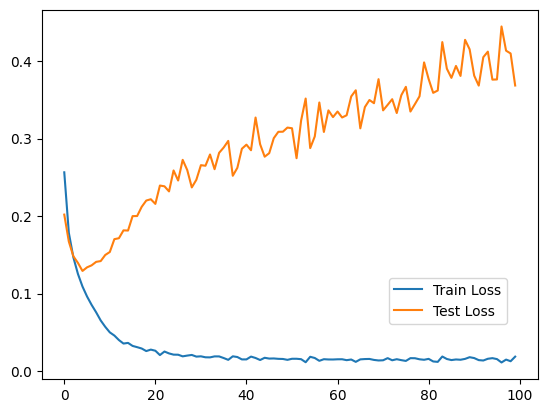

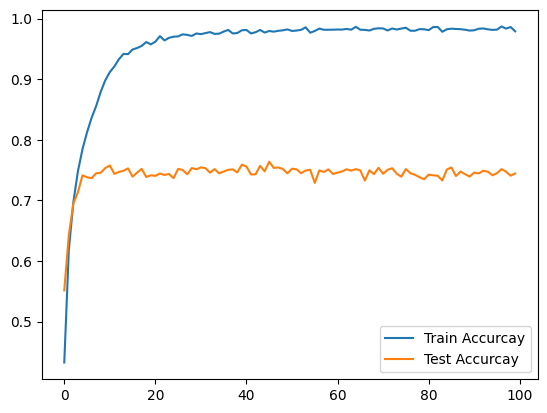

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend(loc=(0.7, 0.15))
plt.show()

plt.plot(history.history['accuracy'], label='Train Accurcay')
plt.plot(history.history['val_accuracy'], label='Test Accurcay')
plt.legend()
plt.show()

- 모델을 재정의하세요. (Summary를 참고하세요)
    - CNN 레이어에 드롭아웃을 적용하세요.
    - 입력 shape = (32, 32, 3)
    - 합성곱 1계층 = Conv2D 2개
    - 필터 개수 = 32개 (출력 Feature Map 수)
    - 필터 size = (3,3)
    - 활성화 함수 = relu
    - 풀링 계층 = 맥스풀링 1개
    - 풀링 size = (2,2)
    - 드롭아웃 = 0.2
    - 합성곱 2계층 = Conv2D 2개
    - 필터 개수 = 64개 (출력 Feature Map 수)
    - 필터 size = (3,3)
    - 활성화 함수 = relu
    - 풀링 size = (2,2)
    - 드롭아웃 = 0.2
    - 합성곱 3계층 = Conv2D 2개
    - 필터 개수 = 128개 (출력 Feature Map 수)
    - 필터 size = (3,3)
    - 활성화 함수 = relu
    - 풀링 size = (2,2)
    - 드롭아웃 = 0.2
    - 패딩 = same (Conv2D만)
    - Dense에 입력으로 넣기 위한 Flatten 계층을 추가해주세요.
    - 은닉층 = 1개
    - 뉴런 수 = 128개
    - 출력 수 = 10개

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.regularizers import l2

model = Sequential()

# 첫 번째 합성곱 계층 (Conv2D x 2) 및 드롭아웃
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

# 두 번째 합성곱 계층 (Conv2D x 2) 및 드롭아웃
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

# 세 번째 합성곱 계층 (Conv2D x 2) 및 드롭아웃
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

# Flatten 계층
model.add(Flatten())

# 은닉층 및 드롭아웃
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

# 출력층
model.add(Dense(10, activation='softmax'))

# 모델 요약 출력
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

- 모델을 컴파일 하세요
    - loss = categorical_crossentropy
    - optimizer = adam
    - metrics = accuracy

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

- 모델을 학습시키세요
    - epoch=100
    - batch_size=128
    - train = train_images, train_labels
    - validation_data = (test_images, test_labels)
    - validation_data로 test_images와 test_labels를 지정하세요.
- 학습 결과를 history 변수에 저장하세요.

In [ ]:
history = model.fit(train_images, train_labels, epochs=100, batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/100
391/391 [==============================] - 9s 16ms/step - loss: 1.9603 - accuracy: 0.3170 - val_loss: 1.3926 - val_accuracy: 0.4878
Epoch 2/100
391/391 [==============================] - 6s 15ms/step - loss: 1.3715 - accuracy: 0.5056 - val_loss: 1.2219 - val_accuracy: 0.5630
Epoch 3/100
391/391 [==============================] - 6s 15ms/step - loss: 1.1439 - accuracy: 0.5934 - val_loss: 0.9721 - val_accuracy: 0.6600
Epoch 4/100
391/391 [==============================] - 6s 15ms/step - loss: 1.0036 - accuracy: 0.6488 - val_loss: 0.8943 - val_accuracy: 0.6847
Epoch 5/100
391/391 [==============================] - 6s 15ms/step - loss: 0.9129 - accuracy: 0.6795 - val_loss: 0.8734 - val_accuracy: 0.6985
Epoch 6/100
391/391 [==============================] - 6s 15ms/step - loss: 0.8467 - accuracy: 0.7054 - val_loss: 0.7828 - val_accuracy: 0.7269
Epoch 7/100
391/391 [==============================] - 6s 15ms/step - loss: 0.8029 - accuracy: 0.7187 - val_loss: 0.7586 - val_accuracy:

- 학습 결과를 시각화 하세요.

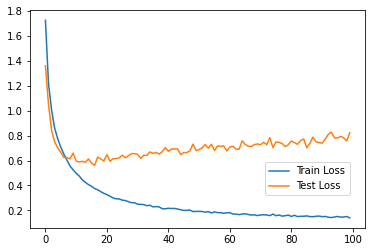

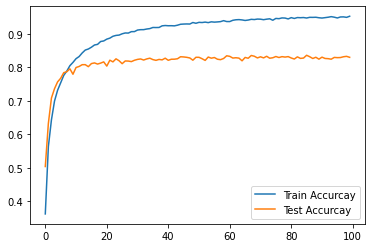

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend(loc=(0.7, 0.15))
plt.show()

plt.plot(history.history['accuracy'], label='Train Accurcay')
plt.plot(history.history['val_accuracy'], label='Test Accurcay')
plt.legend()
plt.show()

- 모델을 재정의하세요. (Summary를 참고하세요)
    - Conv2D 레이어에 l2 규제를 적용하세요. kernel_regularizer=l2(0.005)
    - 입력 shape = (32, 32, 3)
    - 합성곱 1계층 = Conv2D 2개
    - 필터 개수 = 32개 (출력 Feature Map 수)
    - 필터 size = (3,3)
    - 활성화 함수 = relu
    - 풀링 계층 = 맥스풀링 1개
    - 풀링 size = (2,2)
    - 합성곱 2계층 = Conv2D 2개
    - 필터 개수 = 64개 (출력 Feature Map 수)
    - 필터 size = (3,3)
    - 활성화 함수 = relu
    - 풀링 size = (2,2)
    - 합성곱 3계층 = Conv2D 2개
    - 필터 개수 = 128개 (출력 Feature Map 수)
    - 필터 size = (3,3)
    - 활성화 함수 = relu
    - 풀링 size = (2,2)
    - 패딩 = same (Conv2D만)
    - Dense에 입력으로 넣기 위한 Flatten 계층을 추가해주세요.
    - 은닉층 = 1개
    - 뉴런 수 = 128개
    - 출력 수 = 10개

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.regularizers import l2

model =

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_37 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_39 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                 

- 모델을 컴파일 하세요
    - loss = binary_crossentropy
    - optimizer = adam
    - metrics = accuracy

- 모델을 학습시키세요
    - epoch=100
    - batch_size=128
    - train = train_images, train_labels
    - validation_data = (test_images, test_labels)
    - validation_data로 test_images와 test_labels를 지정하세요.
- 학습 결과를 history 변수에 저장하세요.

In [ ]:
history =

Epoch 1/100
391/391 [==============================] - 7s 15ms/step - loss: 3.1790 - accuracy: 0.3859 - val_loss: 2.0852 - val_accuracy: 0.4810
Epoch 2/100
391/391 [==============================] - 5s 14ms/step - loss: 1.9158 - accuracy: 0.5193 - val_loss: 1.7646 - val_accuracy: 0.5589
Epoch 3/100
391/391 [==============================] - 6s 15ms/step - loss: 1.7055 - accuracy: 0.5774 - val_loss: 1.6093 - val_accuracy: 0.6020
Epoch 4/100
391/391 [==============================] - 6s 14ms/step - loss: 1.5807 - accuracy: 0.6120 - val_loss: 1.5614 - val_accuracy: 0.6159
Epoch 5/100
391/391 [==============================] - 6s 15ms/step - loss: 1.5018 - accuracy: 0.6340 - val_loss: 1.4587 - val_accuracy: 0.6496
Epoch 6/100
391/391 [==============================] - 6s 14ms/step - loss: 1.4304 - accuracy: 0.6528 - val_loss: 1.4674 - val_accuracy: 0.6240
Epoch 7/100
391/391 [==============================] - 6s 14ms/step - loss: 1.3914 - accuracy: 0.6652 - val_loss: 1.4111 - val_accuracy:

- 학습 결과를 시각화 하세요.

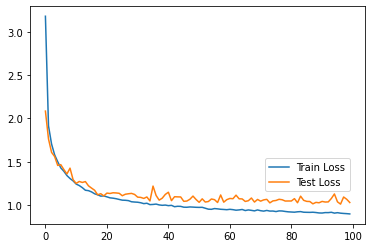

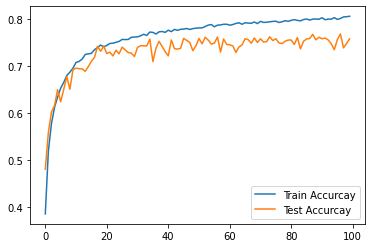

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend(loc=(0.7, 0.15))
plt.show()

plt.plot(history.history['accuracy'], label='Train Accurcay')
plt.plot(history.history['val_accuracy'], label='Test Accurcay')
plt.legend()
plt.show()

- ImageDataGenerator를 이용해 Train 데이터를 증식 시키고자 합니다.
- 다음과 같은 옵션을 사용하는 Generator를 생성하세요.
    - width_shift_range=0.1
    - height_shift_range=0.1
    - horizontal_flip=True

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

generator =

- train_dataset 변수를 generator의 flow 함수를 이용하여 만드세요.
  - batch_size = 64.

In [ ]:
train_dataset =

- 위에서 구성한 CNN 모델을 그대로 사용합니다.
    - fit 함수에 train_images, train_labels 대신 제너레이터 train_dataset을 입력으로 학습하세요.
    - steps_per_epoch = 780
    - epochs = 100
    - validation_data = (test_images, test_labels)
- 학습 결과를 history 변수에 저장하세요.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.regularizers import l2

model =

In [ ]:
history =

Epoch 1/100
780/780 [==============================] - 25s 32ms/step - loss: 1.1906 - accuracy: 0.7052 - val_loss: 1.2013 - val_accuracy: 0.7055
Epoch 2/100
780/780 [==============================] - 26s 33ms/step - loss: 1.1639 - accuracy: 0.7107 - val_loss: 1.1852 - val_accuracy: 0.7052
Epoch 3/100
780/780 [==============================] - 26s 33ms/step - loss: 1.1506 - accuracy: 0.7139 - val_loss: 1.1613 - val_accuracy: 0.7113
Epoch 4/100
780/780 [==============================] - 25s 32ms/step - loss: 1.1523 - accuracy: 0.7110 - val_loss: 1.1289 - val_accuracy: 0.7235
Epoch 5/100
780/780 [==============================] - 24s 31ms/step - loss: 1.1444 - accuracy: 0.7152 - val_loss: 1.0443 - val_accuracy: 0.7498
Epoch 6/100
780/780 [==============================] - 24s 31ms/step - loss: 1.1380 - accuracy: 0.7155 - val_loss: 1.1175 - val_accuracy: 0.7192
Epoch 7/100
780/780 [==============================] - 24s 31ms/step - loss: 1.1384 - accuracy: 0.7146 - val_loss: 1.1210 - val_ac

- 학습 결과를 시각화 하세요.

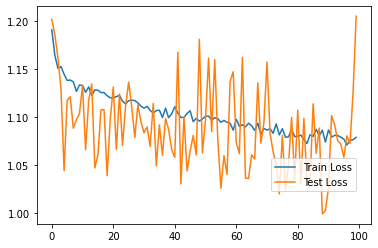

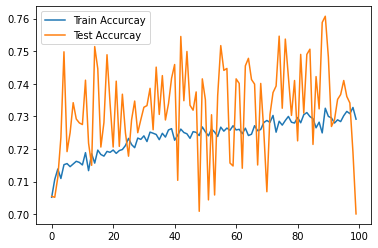

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend(loc=(0.7, 0.15))
plt.show()

plt.plot(history.history['accuracy'], label='Train Accurcay')
plt.plot(history.history['val_accuracy'], label='Test Accurcay')
plt.legend()
plt.show()

### 자유롭게 모델을 구성하여 모델링해보세요.